Projeto de Inteligência Artifical voltado para o Reconhecimento da Datilologia

Grupo: Alina Tainá Germano Costa, Júlia de Oliveira Tavares, Lucas Emanuel Camilo Bezerra e Pedro Henrique Correia Bezerra Silva


A FAZER:
- CRIAR GRÁFICOS: MUITO IMPORTANTE PARA ENTENDER OS RESULTADOS DOS MODELOS
- DIVIDIR A PARTE DE VALIDAÇÃO
- USAR A BIBLIOTECA GRIDSEARCHCV
- RESPONDER O RELATÓRIO COM BASE NOS RESULTADOS OBTIDOS 
- APRESENTAR COM FUNDAMENTO SOBRE O PORQUÊ DAS NOSSAS ESCOLHAS

POSSIBILIDADE: 
- ALGORITMOS DE OTIMIZAÇÃO JUNTO DO GRIDSEARCHCV
- IDENTIFICAR O SINAL PELA WEBCAM AO VIVO

In [1]:
# import de algumas bibliotecas essenciais: PIL, Image - faz o processo de conversão da imagem; Numpy - fundamental para a manipulação de dados; 
# Matplotlib.pyplot - essencial para a plotagem de gráficos; os - necessária para acessar as imagens dentro do diretório "datilologia"
# Importação das bibliotecas necessárias
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import os

In [2]:
# Carregar os dados preparados
x_treino = np.load('x_treino.npy')  # Carrega as imagens de treinamento
y_treino = np.load('y_treino.npy')  # Carrega os rótulos de treinamento
z_treino = np.load('z_treino.npy')

x_validacao = np.load('x_validacao.npy')  # Carrega as imagens de validação
y_validacao = np.load('y_validacao.npy')  # Carrega os rótulos de validação
z_validacao = np.load('z_validacao.npy')

x_teste = np.load('x_teste.npy')  # Carrega as imagens de teste
y_teste = np.load('y_teste.npy')  # Carrega os rótulos de teste
z_teste = np.load('z_teste.npy')

print(np.shape(x_treino))
print(np.shape(x_validacao))
print(np.shape(x_teste))

(27771, 4096)
(6943, 4096)
(11548, 4096)


In [3]:
def plotar_matriz_confusao(respostas, predicoes, rotulos):
    cm = confusion_matrix(respostas, predicoes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rotulos, yticklabels=rotulos)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def plotar_relatorio_classificacao(respostas, predicoes, rotulos):
    report = classification_report(respostas, predicoes, target_names=rotulos, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    data = {metric: [report[cls][metric] for cls in rotulos] for metric in metrics}
    x = np.arange(len(rotulos))

    plt.figure(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i * 0.2, data[metric], width=0.2, label=metric)

    plt.xticks(x + 0.2, rotulos)
    plt.ylabel('Scores')
    plt.title('Classification Metrics by Class')
    plt.legend()
    plt.show()

def plotar_curvas_roc(respostas, probabilidade, rotulos):
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(rotulos):
        fpr, tpr, _ = roc_curve(respostas == i, probabilidade[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

# TREE padrão:
- criterion: "gini"
- splitter: "best"
- max_depth: None
- min_samples_split: 2
- min_samples_leaf: 1
- min_weight_fraction_leaf: 0
- max_features: None
- random_state: None
- max_leaf_nodes: None
- min_impurity_decrease: 0
- class_weight: None
- ccp_alpha: 0

In [4]:
# Inicializar e treinar o modelo
arvore_padrao = DecisionTreeClassifier()
arvore_padrao.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [5]:
predicao_validacao_padrao = arvore_padrao.predict(x_validacao)
treino_acuracia_padrao = accuracy_score(y_validacao, predicao_validacao_padrao)
print("Acurácia (modelo inicial):", treino_acuracia_padrao)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_validacao, predicao_validacao_padrao))

Acurácia (modelo inicial): 0.947861155120265
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.95      0.96      0.95       328
           B       0.94      0.95      0.95       342
           C       0.98      0.97      0.97       349
           D       0.93      0.91      0.92       327
           E       0.94      0.94      0.94       340
           F       0.93      0.94      0.94       340
           G       0.92      0.92      0.92       338
           I       0.92      0.91      0.91       320
           L       0.96      0.96      0.96       354
           M       0.99      0.96      0.98       312
           N       0.98      0.97      0.97       319
           O       0.92      0.95      0.94       340
           P       0.98      1.00      0.99       324
           Q       0.97      0.99      0.98       317
           R       0.93      0.94      0.94       310
           S       0.95      0.92      0.94 

In [6]:
predicao_teste_padrao = arvore_padrao.predict(x_teste)
teste_acuracia_padrao = accuracy_score(y_teste, predicao_teste_padrao)
print("Acurácia (modelo inicial):", teste_acuracia_padrao)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_padrao))

Acurácia (modelo inicial): 0.7383962590924835
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.89      0.65      0.75       579
           B       0.63      0.89      0.74       562
           C       0.85      0.85      0.85       583
           D       0.58      0.69      0.63       550
           E       0.78      0.69      0.73       574
           F       0.70      0.74      0.72       450
           G       0.62      0.59      0.60       550
           I       0.64      0.72      0.68       550
           L       0.91      0.89      0.90       550
           M       0.80      0.88      0.84       550
           N       0.79      0.61      0.69       550
           O       0.77      0.76      0.76       550
           P       0.89      0.95      0.92       550
           Q       0.89      0.90      0.89       550
           R       0.59      0.59      0.59       550
           S       0.65      0.61      0.63

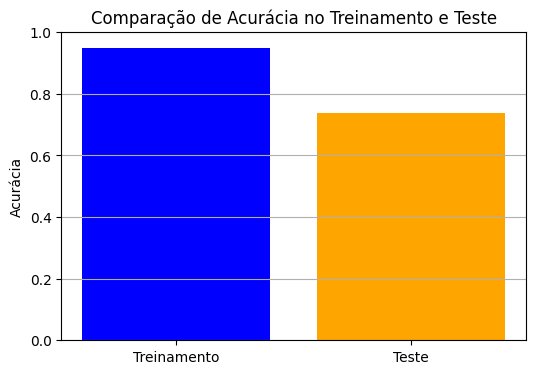

In [7]:
# Visualização dos resultados
plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [treino_acuracia_padrao, teste_acuracia_padrao], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia no Treinamento e Teste')
plt.grid(axis='y')
plt.show()

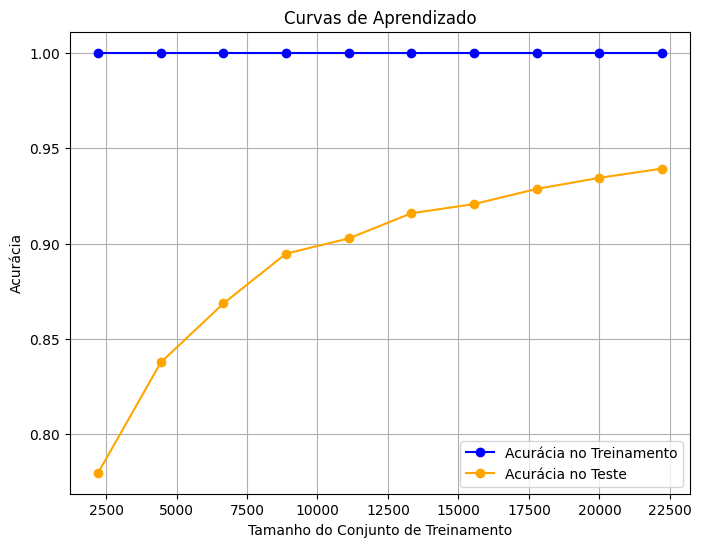

In [8]:
train_sizes, train_scores, test_scores = learning_curve(
    arvore_padrao, x_treino, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()

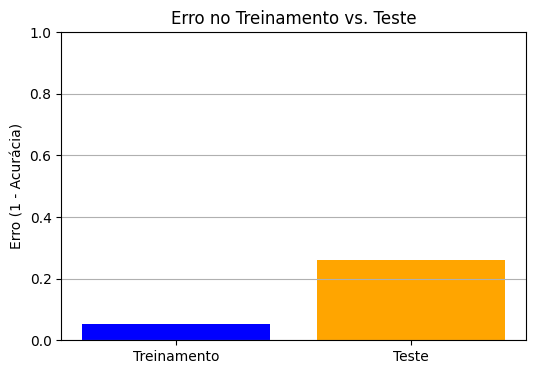

In [9]:
train_error = 1 - treino_acuracia_padrao
test_error = 1 - teste_acuracia_padrao

plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [train_error, test_error], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Erro (1 - Acurácia)')
plt.title('Erro no Treinamento vs. Teste')
plt.grid(axis='y')
plt.show()

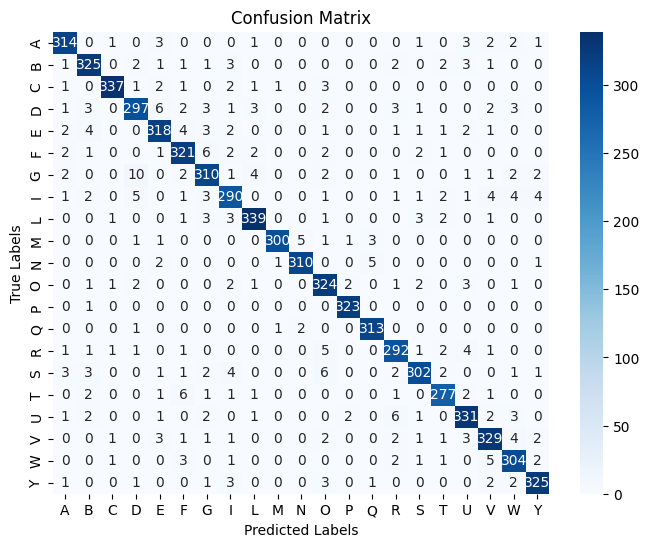

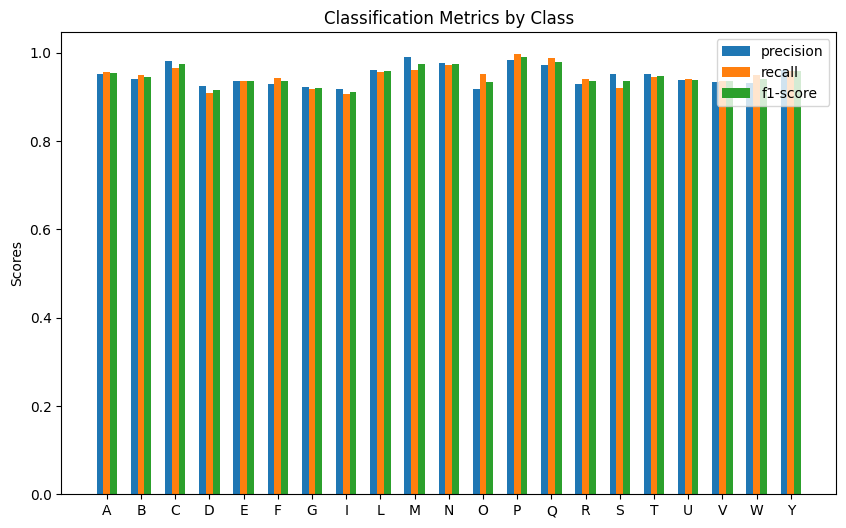

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

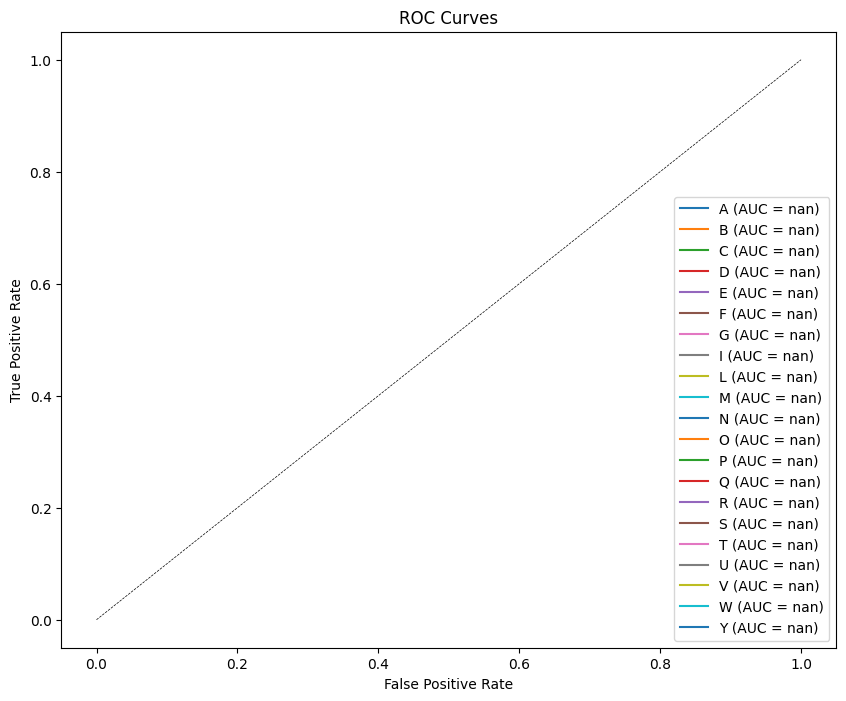

In [10]:
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_validacao = arvore_padrao.predict_proba(x_validacao)

plotar_matriz_confusao(y_validacao, predicao_validacao_padrao, letras)
plotar_relatorio_classificacao(y_validacao, predicao_validacao_padrao, letras)
plotar_curvas_roc(y_validacao, y_prob_validacao, letras)

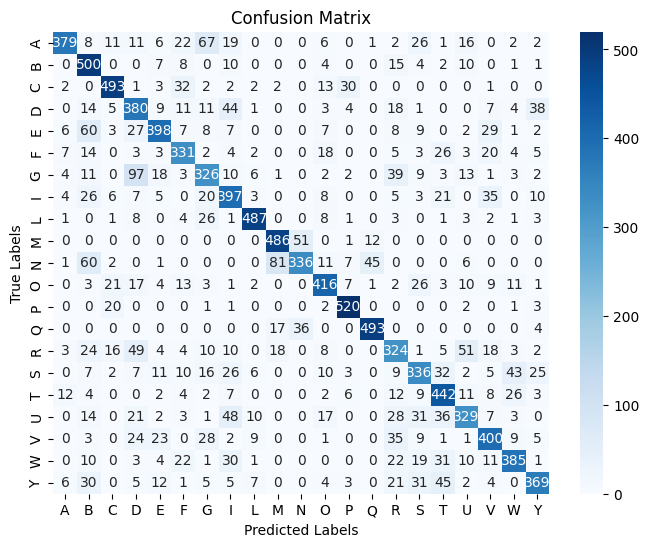

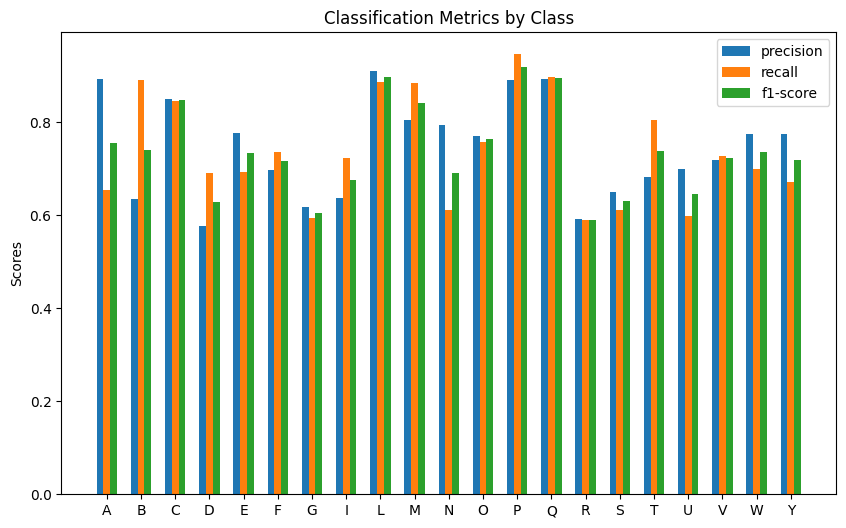

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

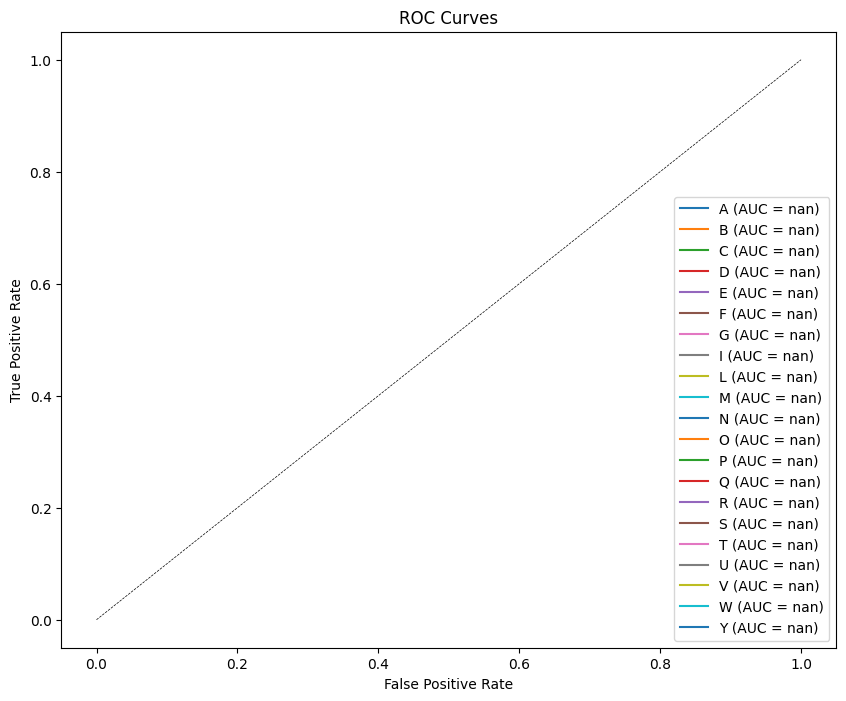

In [11]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = arvore_padrao.predict_proba(x_teste)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_padrao, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_padrao, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

In [12]:
x_validacao_ruidosa = x_validacao + np.random.normal(0, 0.1, x_validacao.shape)
x_validacao_ruidosa = np.clip(x_validacao_ruidosa, 0, 1)

y_pred_ruidosa = arvore_padrao.predict(x_validacao_ruidosa)
treino_acuracia_padrao = accuracy_score(y_validacao, y_pred_ruidosa)

print("Acurácia:", treino_acuracia_padrao)

Acurácia: 0.32032262710643816


In [13]:
x_teste_ruidosa = x_teste + np.random.normal(0, 0.1, x_teste.shape)
x_teste_ruidosa = np.clip(x_teste_ruidosa, 0, 1)

y_pred_ruidosa = arvore_padrao.predict(x_teste_ruidosa)
teste_acuracia_padrao = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_padrao)

Acurácia: 0.27563214409421544


# TREE otimizado:
- criterion: 'entropy'
- max_depth: 10
- min_samples_leaf: 50
- min_samples_split: 10

In [14]:
#Define os hiperparâmetros para a busca
parametros = {
    'criterion': ['entropy'],
    'max_depth': [ 10, 40],
    'min_samples_split': [10],
    'min_samples_leaf': [50]
}

#Inicializa o modelo de árvore de decisão
arvore_padrao = DecisionTreeClassifier(random_state=42)

#Configura o GridSearchCV
grid_search = GridSearchCV(
    estimator=arvore_padrao,
    param_grid=parametros,
    cv=2,  # Número de divisões para validação cruzada
    scoring='accuracy',  # Métrica para avaliar os modelos
    n_jobs=-1  # Utilizar todos os núcleos disponíveis
)

#Realiza o fit do GridSearchCV
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 40],
                         'min_samples_leaf': [50], 'min_samples_split': [10]},
             scoring='accuracy')

In [15]:
# Exibir melhores parâmetros e melhor score
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score encontrado:", grid_search.best_score_)

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 10}
Melhor score encontrado: 0.7888804878616769


In [16]:
# Inicializar e treinar o modelo
arvore_otimizada = grid_search.best_estimator_ 
arvore_otimizada.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=10, random_state=42)

In [17]:
predicao_validacao_otimizado = arvore_otimizada.predict(x_validacao)
treino_acuracia_otimizado = accuracy_score(y_validacao, predicao_validacao_otimizado)
print("Acurácia (modelo inicial):", treino_acuracia_otimizado)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_validacao, predicao_validacao_otimizado))

Acurácia (modelo inicial): 0.8510730231888233
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.89      0.83      0.86       328
           B       0.80      0.85      0.82       342
           C       0.89      0.91      0.90       349
           D       0.79      0.83      0.81       327
           E       0.81      0.87      0.84       340
           F       0.83      0.83      0.83       340
           G       0.82      0.80      0.81       338
           I       0.78      0.83      0.80       320
           L       0.91      0.87      0.89       354
           M       0.94      0.94      0.94       312
           N       0.91      0.88      0.90       319
           O       0.89      0.76      0.82       340
           P       0.96      0.96      0.96       324
           Q       0.92      0.94      0.93       317
           R       0.79      0.80      0.79       310
           S       0.80      0.85      0.82

In [18]:
predicao_teste_otimizado = arvore_otimizada.predict(x_teste)
teste_acuracia_otimizado = accuracy_score(y_teste, predicao_teste_otimizado)
print("Acurácia (modelo inicial):", teste_acuracia_otimizado)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_otimizado))

Acurácia (modelo inicial): 0.6961378593695878
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.81      0.73      0.77       579
           B       0.61      0.81      0.70       562
           C       0.86      0.79      0.83       583
           D       0.64      0.55      0.59       550
           E       0.64      0.57      0.61       574
           F       0.65      0.69      0.67       450
           G       0.72      0.53      0.61       550
           I       0.51      0.62      0.56       550
           L       0.87      0.83      0.85       550
           M       0.86      0.88      0.87       550
           N       0.77      0.77      0.77       550
           O       0.79      0.51      0.62       550
           P       0.84      0.98      0.90       550
           Q       0.89      0.86      0.88       550
           R       0.49      0.53      0.51       550
           S       0.51      0.58      0.54

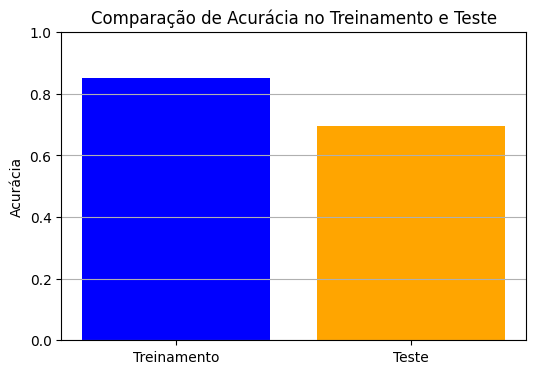

In [19]:
# Visualização dos resultados
plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [treino_acuracia_otimizado, teste_acuracia_otimizado], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia no Treinamento e Teste')
plt.grid(axis='y')
plt.show()

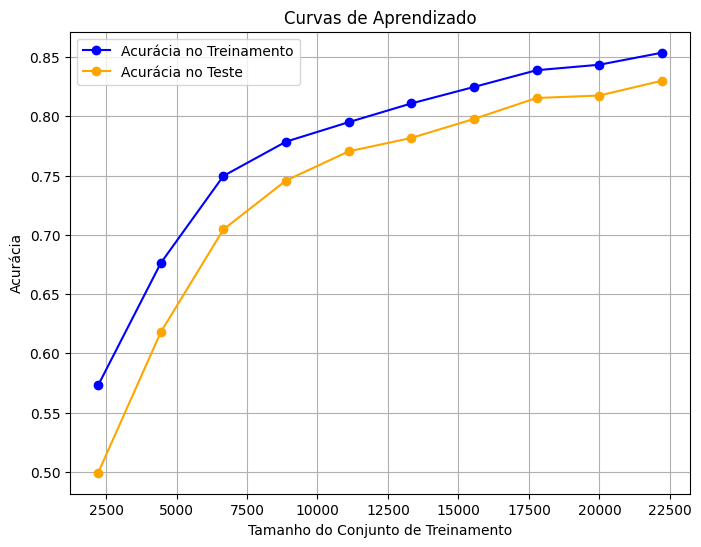

In [20]:
train_sizes, train_scores, test_scores = learning_curve(
    arvore_otimizada, x_treino, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()

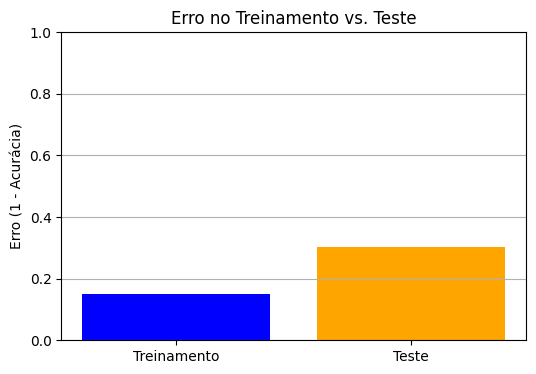

In [21]:
train_error = 1 - treino_acuracia_otimizado
test_error = 1 - teste_acuracia_otimizado

plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Teste'], [train_error, test_error], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Erro (1 - Acurácia)')
plt.title('Erro no Treinamento vs. Teste')
plt.grid(axis='y')
plt.show()

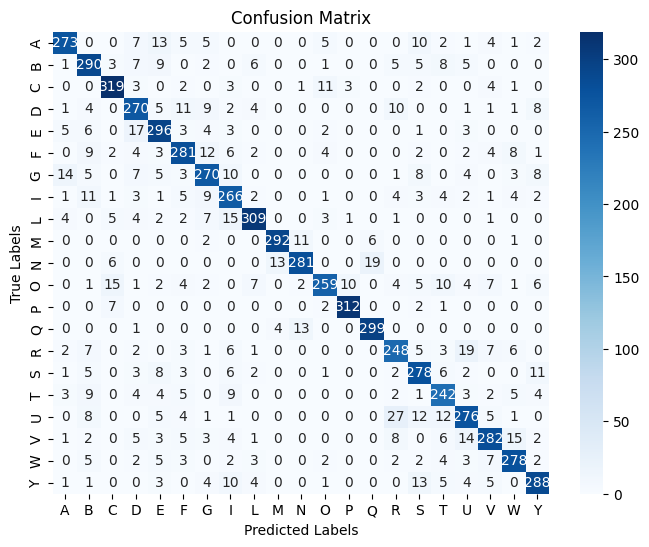

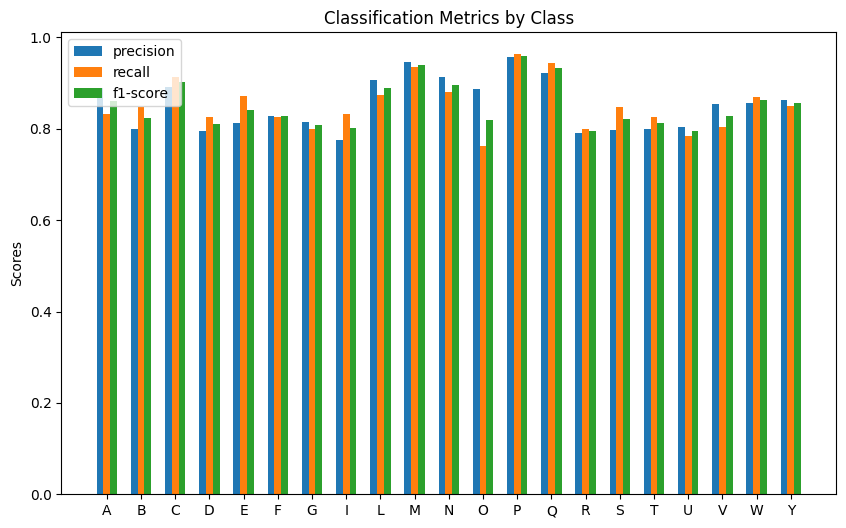

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

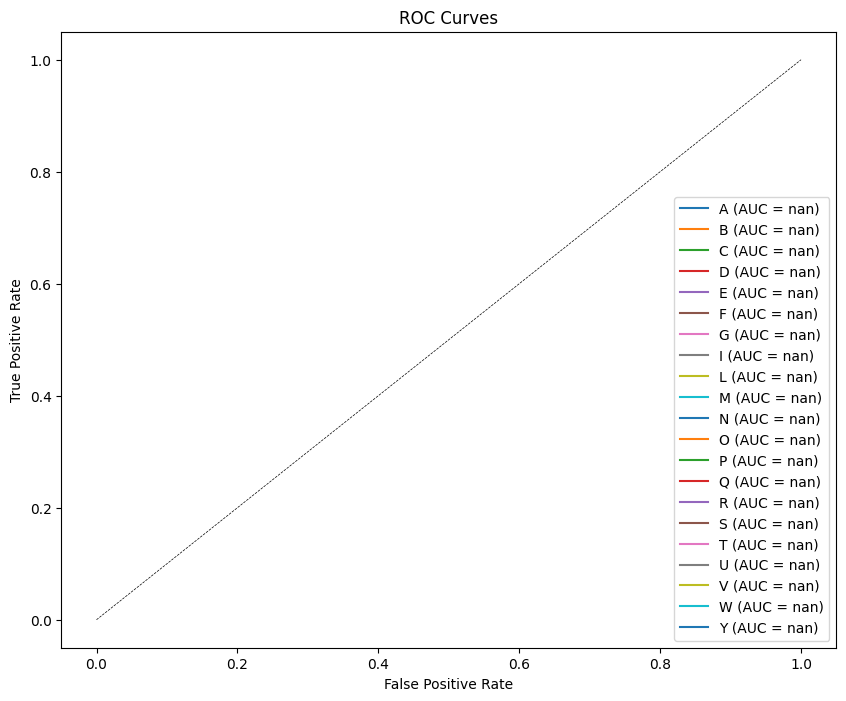

In [22]:
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_validacao = arvore_otimizada.predict_proba(x_validacao)

plotar_matriz_confusao(y_validacao, predicao_validacao_otimizado, letras)
plotar_relatorio_classificacao(y_validacao, predicao_validacao_otimizado, letras)
plotar_curvas_roc(y_validacao, y_prob_validacao, letras)

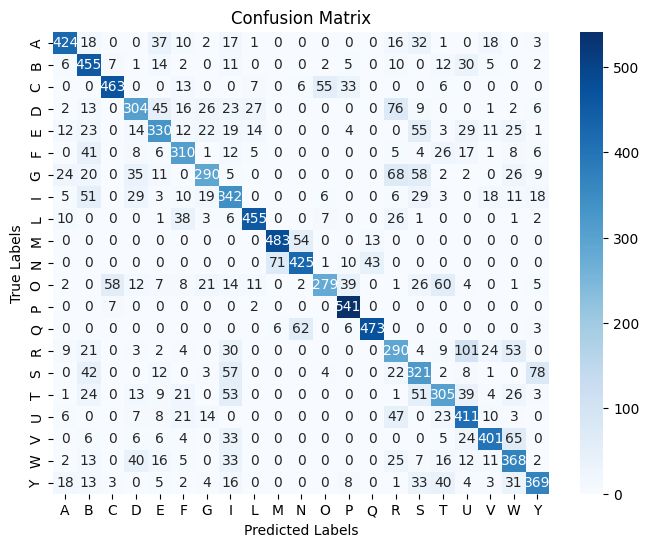

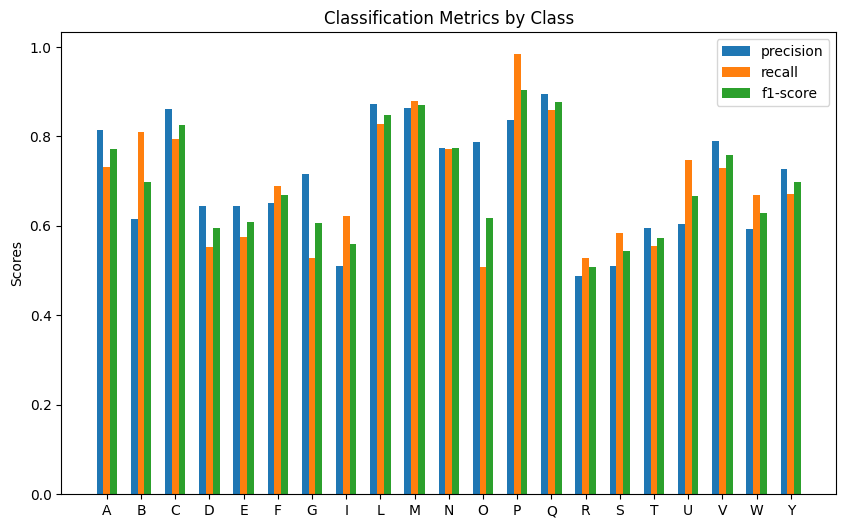

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

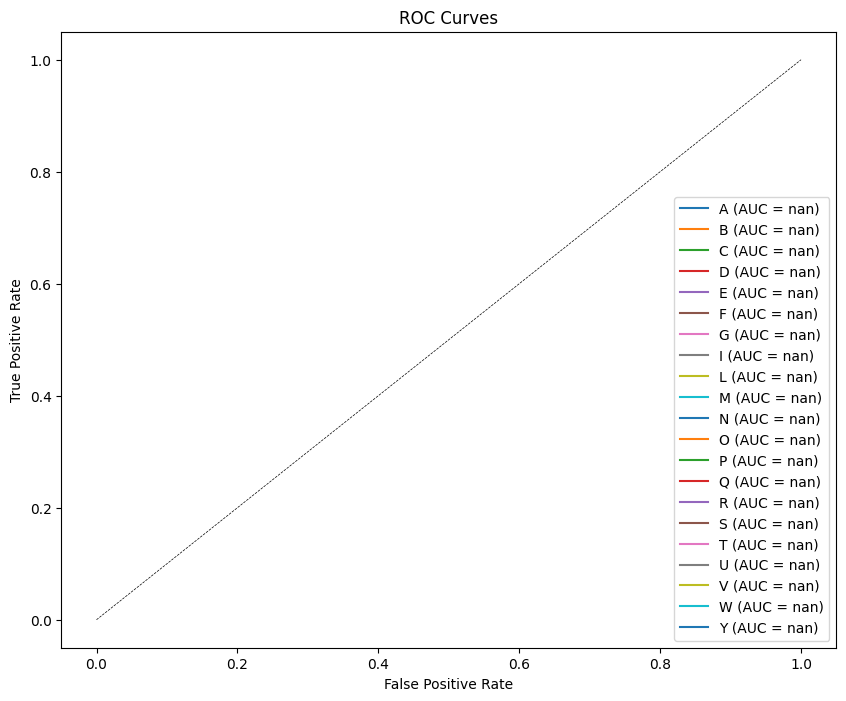

In [23]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = arvore_otimizada.predict_proba(x_teste)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_otimizado, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_otimizado, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

In [24]:
x_validacao_ruidosa = x_validacao + np.random.normal(0, 0.1, x_validacao.shape)
x_validacao_ruidosa = np.clip(x_validacao_ruidosa, 0, 1)

y_pred_ruidosa = arvore_otimizada.predict(x_validacao_ruidosa)
treino_acuracia_padrao = accuracy_score(y_validacao, y_pred_ruidosa)

print("Acurácia:", treino_acuracia_padrao)

Acurácia: 0.3204666570646694


In [25]:
x_teste_ruidosa = x_teste + np.random.normal(0, 0.1, x_teste.shape)
x_teste_ruidosa = np.clip(x_teste_ruidosa, 0, 1)

y_pred_ruidosa = arvore_otimizada.predict(x_teste_ruidosa)
teste_acuracia_padrao = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_padrao)

Acurácia: 0.28420505715275374


In [26]:
from sklearn.decomposition import PCA

# Definir o PCA para reter 95% da variância dos dados
pca = PCA(n_components=0.95)  # Retém 95% da variância
x_treino_pca = pca.fit_transform(x_treino)
x_validacao_pca = pca.transform(x_validacao)
x_teste_pca = pca.transform(x_teste)

print("TREINAMENTO")
print(f"Dimensões originais: {np.shape(x_treino)}")
print(f"Dimensões após PCA: {np.shape(x_treino_pca)}")
print("VALIDAÇÃO")
print(f"Dimensões originais: {np.shape(x_validacao)}")
print(f"Dimensões após PCA: {np.shape(x_validacao_pca)}")
print("TESTE")
print(f"Dimensões originais: {np.shape(x_teste)}")
print(f"Dimensões após PCA: {np.shape(x_teste_pca)}")

TREINAMENTO
Dimensões originais: (27771, 4096)
Dimensões após PCA: (27771, 228)
VALIDAÇÃO
Dimensões originais: (6943, 4096)
Dimensões após PCA: (6943, 228)
TESTE
Dimensões originais: (11548, 4096)
Dimensões após PCA: (11548, 228)


# TREE otimizada com PCA

In [27]:
# Inicializar e treinar o modelo
arvore_otimizada_pca = grid_search.best_estimator_ 
arvore_otimizada_pca.fit(x_treino_pca, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=10, random_state=42)

In [28]:
predicao_teste_pca = arvore_otimizada_pca.predict(x_teste_pca)
teste_acuracia_pca = accuracy_score(y_teste, predicao_teste_pca)
print("Acurácia (modelo inicial):", teste_acuracia_pca)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_pca))

Acurácia (modelo inicial): 0.6182022861101489
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.71      0.58      0.64       579
           B       0.76      0.73      0.75       562
           C       0.78      0.69      0.73       583
           D       0.58      0.48      0.53       550
           E       0.77      0.39      0.52       574
           F       0.56      0.60      0.58       450
           G       0.64      0.37      0.47       550
           I       0.50      0.53      0.52       550
           L       0.65      0.75      0.70       550
           M       0.59      0.77      0.67       550
           N       0.92      0.62      0.74       550
           O       0.47      0.45      0.46       550
           P       0.75      0.92      0.83       550
           Q       0.75      0.89      0.82       550
           R       0.66      0.53      0.58       550
           S       0.72      0.50      0.59

In [29]:
x_teste_ruidosa_pca = x_teste_pca + np.random.normal(0, 0.1, x_teste_pca.shape)
x_teste_ruidosa_pca = np.clip(x_teste_ruidosa_pca, 0, 1)

y_pred_ruidosa = arvore_otimizada_pca.predict(x_teste_ruidosa_pca)
teste_acuracia_pca = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_pca)

Acurácia: 0.1773467267059231


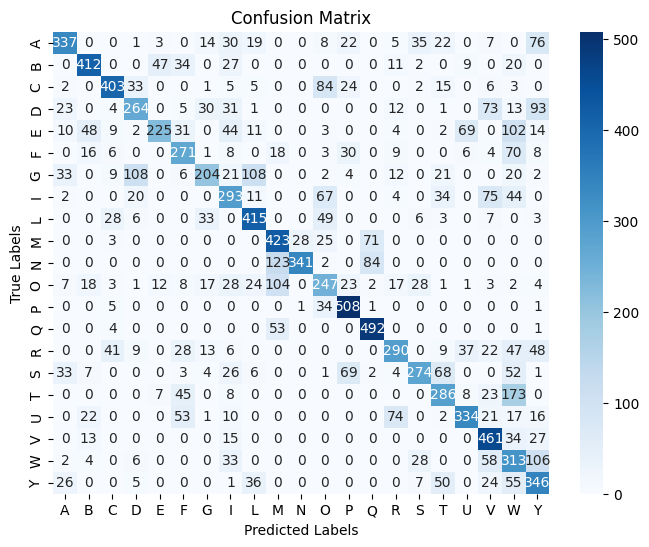

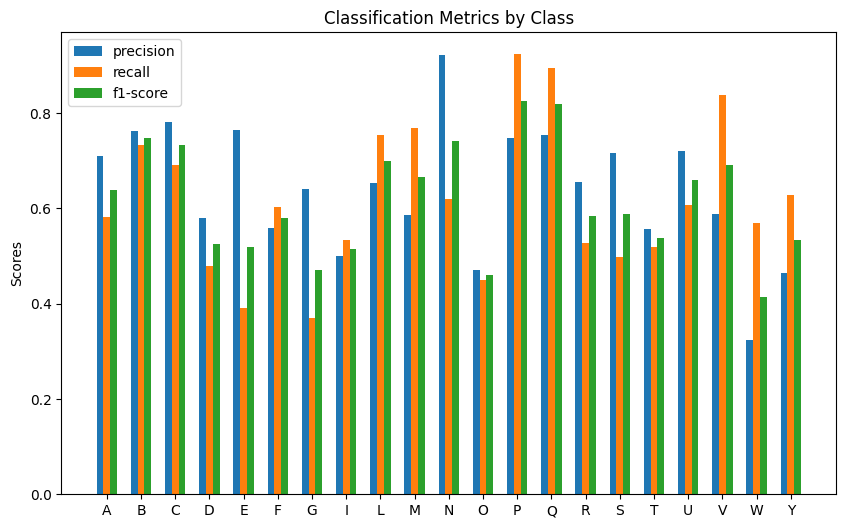

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

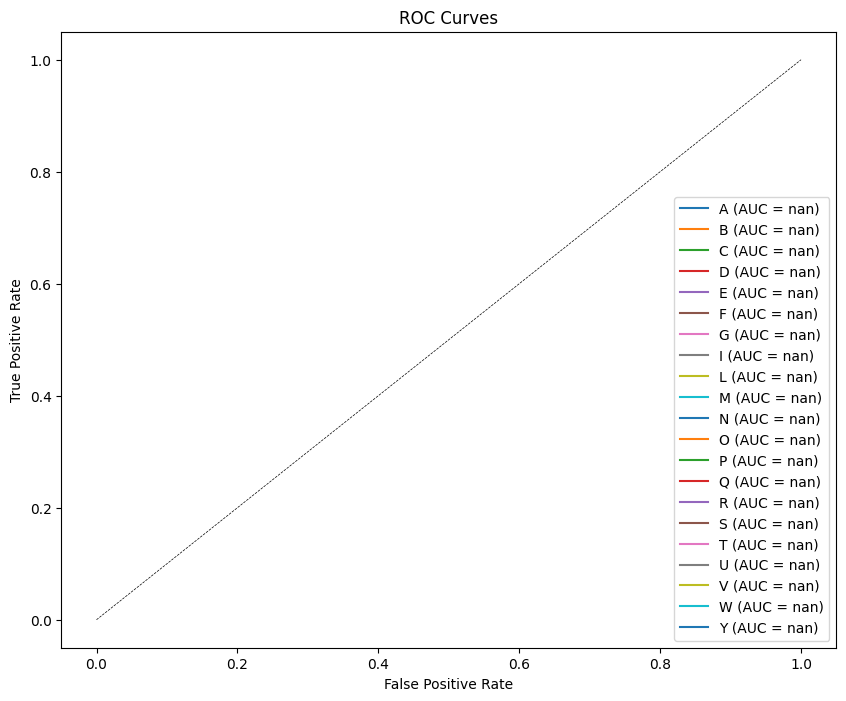

In [37]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = arvore_otimizada_pca.predict_proba(x_teste_pca)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_pca, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_pca, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

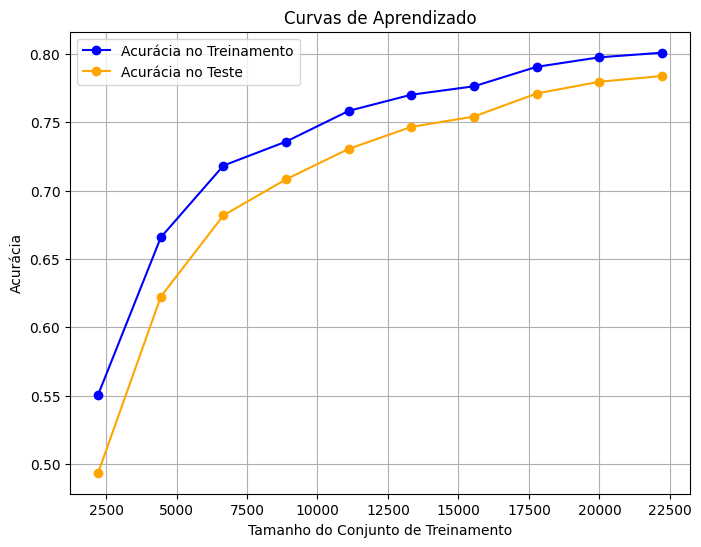

In [30]:
train_sizes, train_scores, test_scores = learning_curve(
    arvore_otimizada_pca, x_treino_pca, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()

# TREE padrão com PCA

In [31]:
arvore_padrao_pca = DecisionTreeClassifier(random_state=42)
arvore_padrao_pca = arvore_padrao_pca.fit(x_treino_pca, y_treino)

In [32]:
predicao_teste_pca_padrao = arvore_padrao_pca.predict(x_teste_pca)
teste_acuracia_pca_padrao = accuracy_score(y_teste, predicao_teste_pca_padrao)
print("Acurácia (modelo inicial):", teste_acuracia_pca_padrao)
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_teste, predicao_teste_pca_padrao))

Acurácia (modelo inicial): 0.6831485971596813
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.60      0.61      0.61       579
           B       0.70      0.75      0.73       562
           C       0.75      0.77      0.76       583
           D       0.63      0.72      0.67       550
           E       0.58      0.58      0.58       574
           F       0.72      0.75      0.73       450
           G       0.66      0.49      0.56       550
           I       0.57      0.53      0.55       550
           L       0.65      0.80      0.72       550
           M       0.65      0.75      0.70       550
           N       0.82      0.58      0.68       550
           O       0.64      0.63      0.64       550
           P       0.75      0.95      0.84       550
           Q       0.78      0.79      0.78       550
           R       0.64      0.81      0.72       550
           S       0.60      0.67      0.64

In [33]:
x_teste_ruidosa_pca = x_teste_pca + np.random.normal(0, 0.1, x_teste_pca.shape)
x_teste_ruidosa_pca = np.clip(x_teste_ruidosa_pca, 0, 1)

y_pred_ruidosa = arvore_padrao_pca.predict(x_teste_ruidosa_pca)
teste_acuracia_pca = accuracy_score(y_teste, y_pred_ruidosa)

print("Acurácia:", teste_acuracia_pca)

Acurácia: 0.07689643228264635


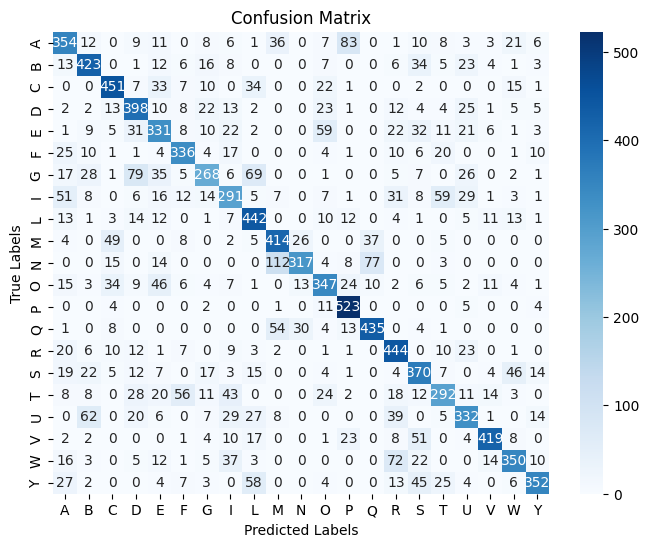

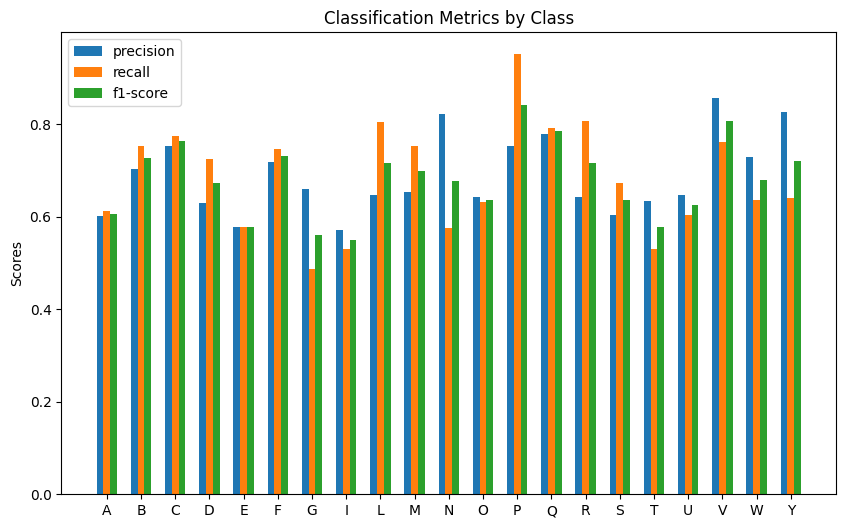

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: Undefined

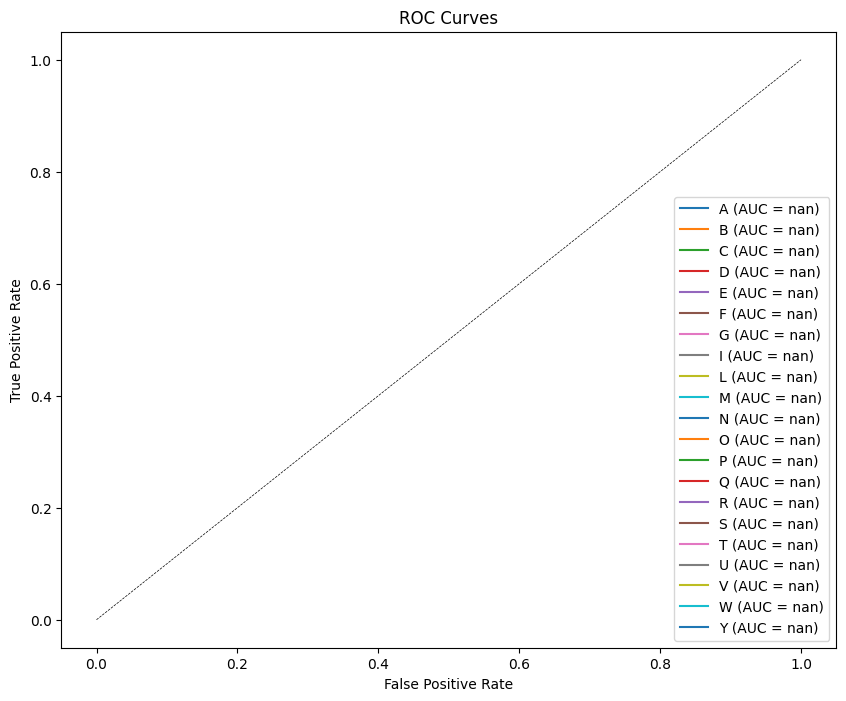

In [36]:
# Código para gerar gráficos de métricas do modelo.
letras = ["A", "B", "C", "D", "E", "F", "G", "I", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "Y"]
y_prob_teste = arvore_padrao_pca.predict_proba(x_teste_pca)

# Código de exemplo (ajustar conforme as variáveis do notebook)
plotar_matriz_confusao(y_teste, predicao_teste_pca_padrao, letras)
plotar_relatorio_classificacao(y_teste, predicao_teste_pca_padrao, letras)
plotar_curvas_roc(y_teste, y_prob_teste, letras)

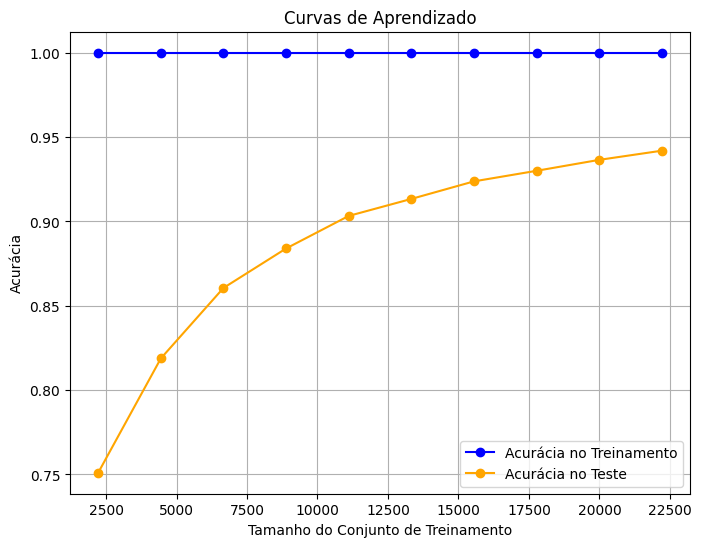

In [34]:
train_sizes, train_scores, test_scores = learning_curve(
    arvore_padrao_pca, x_treino_pca, y_treino, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Acurácia no Treinamento', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Acurácia no Teste', marker='o', color='orange')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.grid()
plt.show()